# 📊 IPO Analysis of ETF Tickers  

In this notebook, we analyze the tickers listed in the **`aiq_20250930.csv`** file to determine their **Initial Public Offering (IPO) dates**.  
This step is important because:  

- It allows us to identify which tickers are **recently listed**.  
- By filtering out newer tickers, we can ensure a **longer and more consistent analysis period** across all companies.  
- This foundation will later help us focus only on stocks with sufficient historical data for deeper trend and performance analysis.  


### 📦 Importing Required Libraries
We import the main Python libraries needed for our analysis:
- **pandas**: for data manipulation and handling CSV files  
- **yfinance**: to fetch stock data, IPO info, and historical prices  
- **matplotlib**: for data visualization and plotting charts 

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### 📂 Load the CSV File  

We load the **`aiq_20250930.csv`** file into a pandas DataFrame.  
- The `skiprows=2` option is used to remove the first two rows, which contain metadata rather than actual ticker data.  
- Finally, we display the first few rows using `.head()` to confirm the dataset has loaded correctly.  


In [ ]:
file_path = r"...\ai-bubble-research\Data_collection\aiq_holdings\aiq_20250930.csv" # Update with your actual file path
top_holdings_df = pd.read_csv(file_path, skiprows=2)
top_holdings_df.head()

,% of Net Assets,Ticker,Name,SEDOL,Market Price ($),Shares Held,Market Value ($)
0,3.97,BABA,ALIBABA GRP-ADR,BP41ZD1,178.73,"1,350,347.00","241,347,519.31"
1,3.64,TSLA,TESLA INC,B616C79,444.72,"496,997.00","221,024,505.84"
2,3.48,GOOGL,ALPHABET INC-CL A,BYVY8G0,243.1,"870,506.00","211,620,008.60"
3,3.38,005930 KS,SAMSUNG ELECTRON,6771720,59.8,"3,437,126.00","205,534,279.89"
4,3.33,700 HK,TENCENT HOLDINGS LTD,BMMV2K8,85.21,"2,377,818.00","202,623,686.96"


### 🛠️ Standardizing Tickers and Extracting IPO Dates  

In this step, we:  
1. **Rename columns** for clarity and consistency.  
2. **Drop rows with missing tickers** to avoid errors.  
3. **Standardize ticker formats**:  
   - Different exchanges use different suffixes (e.g., `.HK` for Hong Kong, `.DE` for Germany, `.T` for Tokyo).  
   - Some tickers need **manual remapping** because Yahoo Finance uses slightly different codes.  
4. Define helper functions:  
   - `get_ipo_date(ticker)`: Fetches the IPO date using Yahoo Finance, falling back to the earliest historical price if needed.  
   - `fix_ticker_format(ticker)`: Corrects ticker symbols using a custom mapping dictionary.  
5. Build an **IPO dictionary** mapping each original ticker to its IPO date.  


In [15]:
# Standardize columns
top_holdings_df.columns = ["Weight", "Ticker", "Name", "SEDOL", "Price", "Shares Held", "Market Value"]

# Drop rows with missing tickers
top_holdings_df = top_holdings_df.dropna(subset=["Ticker"])

tickers = top_holdings_df["Ticker"].unique().tolist()
manual_map = {
    "700.HK": "0700.HK",       # Tencent (needs leading zero)
    "SIE.GR": "SIE.DE",        # Siemens trades in Germany (.DE not .GR)
    "IFX.GR": "IFX.DE",        # Infineon Technologies
    "6702.JP": "6702.T",       # Fujitsu (Tokyo exchange)
    "5803.JP": "5803.T",       # Fujikura
    "EXPN.LN": "EXPN.L",       # Experian (London Stock Exchange)
    "6701.JP": "6701.T",       # NEC Corp
    "4755.JP": "4755.T",       # Rakuten
    "WKL.NA": "WKL.AS",        # Wolters Kluwer (Euronext Amsterdam)
    "3443.TT": "3443.TW",      # Chinese stock (Taiwan Exchange)
    "TIETO.FH": "TIETO.HE",    # TietoEVRY (Helsinki Exchange)
    "6954.JP": "6954.T",       # Fanuc
    "6526.JP": "6526.T",       # Socionext Inc
    "6588.JP": "6588.T",       # Toshiba Tec Corp
    "2353.TT": "2353.TW",      # Acer
    "2395.TT": "2395.TW",      # Advantech
    "AMP.IM": "AMP.MI",        # Amplifon (Italy, Milan Exchange)
}

def get_ipo_date(ticker):
    try:
        stock = yf.Ticker(ticker)
        ipo_ts = stock.info.get("firstTradeDateEpochSeconds", None)
        if ipo_ts:
            return pd.to_datetime(ipo_ts, unit="s").date()
        hist = stock.history(period="max")
        if not hist.empty:
            return hist.index[0].date()
    except Exception as e:
        return None
    return None

def fix_ticker_format(ticker):
    # Convert spaces to dots (Yahoo's format)
    ticker = ticker.replace(" ", ".")
    if ticker in manual_map:
        return manual_map[ticker]
    return ticker


# Build dictionary
ipo_dict = {}
for ticker in tickers:
    yf_ticker = fix_ticker_format(ticker)
    ipo_dict[ticker] = get_ipo_date(yf_ticker)


print(ipo_dict)

{'BABA': datetime.date(2014, 9, 19), 'TSLA': datetime.date(2010, 6, 29), 'GOOGL': datetime.date(2004, 8, 19), '005930 KS': datetime.date(2000, 1, 4), '700 HK': datetime.date(2004, 6, 16), 'AAPL': datetime.date(1980, 12, 12), 'PLTR': datetime.date(2020, 9, 30), 'ORCL': datetime.date(1986, 3, 12), 'TSM': datetime.date(1997, 10, 9), 'AVGO': datetime.date(2009, 8, 6), 'NVDA': datetime.date(1999, 1, 22), 'META': datetime.date(2012, 5, 18), 'MSFT': datetime.date(1986, 3, 13), 'AMD': datetime.date(1980, 3, 17), 'NFLX': datetime.date(2002, 5, 23), 'IBM': datetime.date(1962, 1, 2), 'CSCO': datetime.date(1990, 2, 16), 'AMZN': datetime.date(1997, 5, 15), 'CRM': datetime.date(2004, 6, 23), 'APP': datetime.date(2021, 4, 15), 'SIE GR': datetime.date(1996, 11, 8), 'UBER': datetime.date(2019, 5, 10), 'NOW': datetime.date(2012, 6, 29), 'MU': datetime.date(1984, 6, 1), 'QCOM': datetime.date(1991, 12, 13), 'SHOP': datetime.date(2015, 5, 20), '000660 KS': datetime.date(2000, 1, 4), 'ACN': datetime.date(20

### IPO Distribution Analysis  

After extracting IPO dates for each ticker, we convert them into a DataFrame and analyze the distribution of IPOs over time.  
To do this, we:  
1. Convert the ticker–IPO date dictionary into a structured DataFrame.  
2. Parse and standardize the IPO dates.  
3. Extract the IPO year for each company.  
4. Plot a histogram to visualize how many companies went public in each year.  

This helps us understand whether most tickers are recent IPOs or if they have a long trading history — important when deciding which tickers to exclude for long-term analysis.  


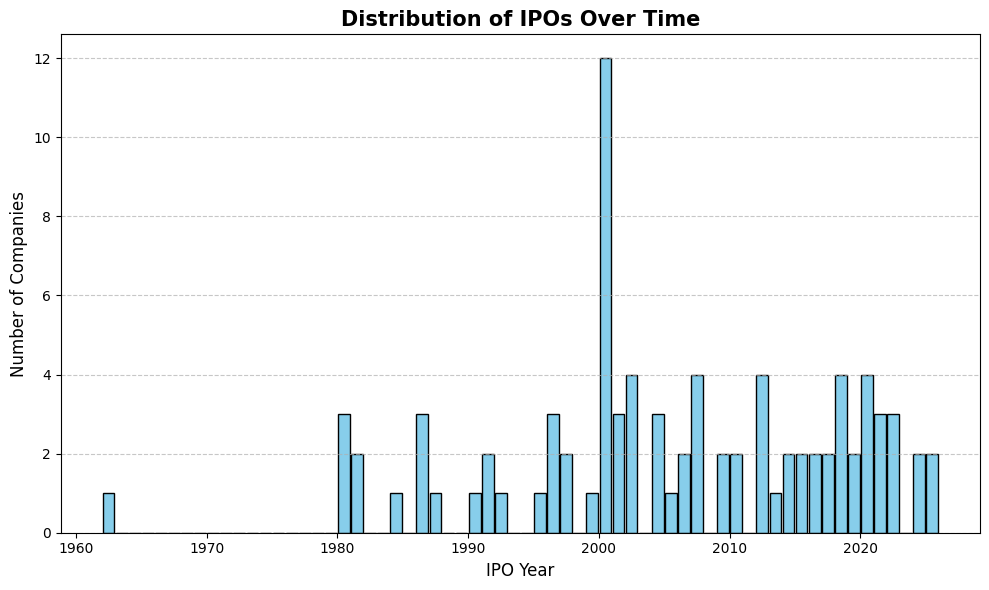

In [16]:
# Convert dict → DataFrame
IPO_date_df = pd.DataFrame(list(ipo_dict.items()), columns=["Ticker", "IPO_Date"])
IPO_date_df["IPO_Date"] = pd.to_datetime(IPO_date_df["IPO_Date"])

# Extract just the year
IPO_date_df["Year"] = IPO_date_df["IPO_Date"].dt.year

# Histogram of IPOs per year
plt.figure(figsize=(10,6))
plt.hist(IPO_date_df["Year"], bins=range(IPO_date_df["Year"].min(), IPO_date_df["Year"].max()+2), 
         color="skyblue", edgecolor="black", rwidth=0.9)

plt.xlabel("IPO Year", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.title("Distribution of IPOs Over Time", fontsize=15, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### Cumulative IPO Counts for Key Years (2015–2025)

In this section, we calculate the **cumulative number of tickers that IPO’d before selected years**: 2015, 2016, 2017, 2018, 2019, 2020, and 2025.  

We chose these years because the **AI industry experienced a breakout period between 2015 and 2020**, marked by major advances in deep learning, the rise of large-scale datasets, and the deployment of AI into real-world applications.  
By including 2025, we also capture the most recent cumulative state of IPOs in our dataset, allowing us to understand how the ticker universe expanded during and after this key period.  

We will present the results in both a **table** and a **graph** to highlight how the number of available companies for analysis grew over time.


,Year,Cumulative_IPOs
0,2015,64
1,2016,66
2,2017,68
3,2018,72
4,2019,74
5,2020,78
6,2025,88


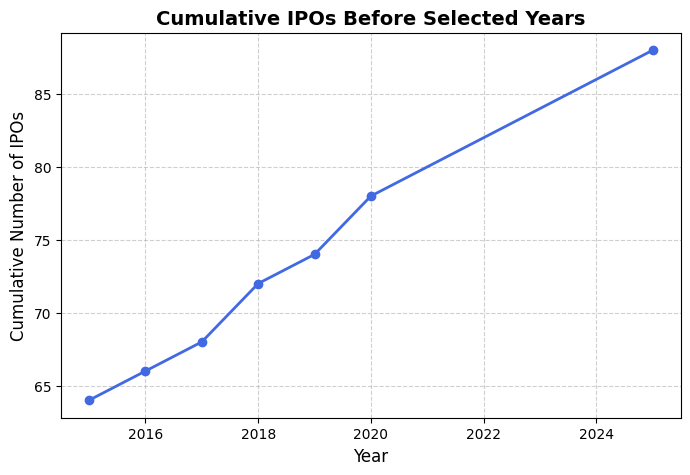

In [17]:
# Define target years
target_years = [2015, 2016, 2017, 2018, 2019, 2020, 2025]

# Count cumulative IPOs up to each year
cumulative_counts = []
for year in target_years:
    count = (IPO_date_df["Year"] <= year).sum()
    cumulative_counts.append(count)

# Create a DataFrame for display
cum_df = pd.DataFrame({
    "Year": target_years,
    "Cumulative_IPOs": cumulative_counts
})

display(cum_df)

# Plot cumulative IPOs over selected years
plt.figure(figsize=(8,5))
plt.plot(cum_df["Year"], cum_df["Cumulative_IPOs"], marker="o", color="royalblue", linewidth=2)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Number of IPOs", fontsize=12)
plt.title("Cumulative IPOs Before Selected Years", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


### Identifying Recently Listed Companies (2015–2025)

In this step, we merge the IPO date information back with the original company names from our dataset.  
By filtering for IPOs that occurred between **2015 and 2025**, we can highlight companies that only appeared in the market relatively recently.  

This gives us **better insight into which stocks are “new players”** in the AI investment space. Such companies may not have long trading histories, which could introduce bias or distortions if we were to include them in a long-term performance analysis.  

The resulting table provides a clear overview of these recent IPOs along with their company names and listing dates.


In [18]:
# Merge IPO info back with original company names
ipo_with_names = IPO_date_df.merge(
    top_holdings_df[["Ticker", "Name"]],  # use original dataframe with names
    on="Ticker",
    how="left"
)

# Filter IPOs between 2020 and 2025
recent_ipos = ipo_with_names[(ipo_with_names["Year"] >= 2015) & (ipo_with_names["Year"] <= 2025)]

# Display as table
print(recent_ipos[["Ticker", "Name", "IPO_Date"]])

     Ticker                       Name   IPO_Date
6      PLTR           PALANTIR TECHN-A 2020-09-30
19      APP      APPLOVIN CORP-CLASS A 2021-04-15
21     UBER      UBER TECHNOLOGIES INC 2019-05-10
25     SHOP      SHOPIFY INC - CLASS A 2015-05-20
32  3690 HK            MEITUAN-CLASS B 2018-09-20
33     SNOW              SNOWFLAKE INC 2020-09-16
40     CRWV         COREWEAVE INC-CL A 2025-03-28
44       ZS                ZSCALER INC 2018-03-16
46     DDOG      DATADOG INC - CLASS A 2019-09-19
47      HUT                 HUT 8 CORP 2018-03-08
49     PONY                PONY AI INC 2024-11-27
51     STNE              STONECO LTD-A 2018-10-25
53     SOUN        SOUNDHOUND AI INC-A 2022-04-28
54     GEHC   GE HEALTHCARE TECHNOLOGY 2022-12-15
58      HPE              HEWLETT PACKA 2015-10-19
62     PATH       UIPATH INC - CLASS A 2021-04-21
67     INFA  INFORMATICA INC - CLASS A 2021-10-27
68  6526 JP              SOCIONEXT INC 2022-10-12
69      WRD             WERIDE INC-ADR 2024-10-25
